In [1]:
import os
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

sc.settings.verbosity = 0
sc.logging.print_header()
sc.settings.figdir = '../figures/'
sc.settings.set_figure_params(dpi=70)

%load_ext autoreload
%autoreload 2 

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.2 scipy==1.6.1 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2


In [2]:
adata = sc.read('./../../data/processed/adata_reannotated_intermediate.h5ad')

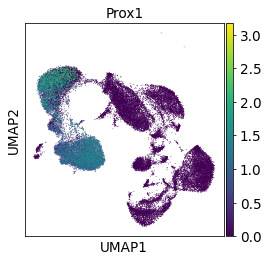

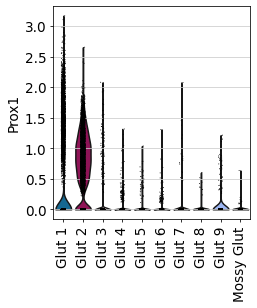

In [5]:
sc.pl.umap(adata[adata.obs.louvain_coarse.str.contains('Glut')], color='Prox1')
sc.pl.violin(
    adata[adata.obs.louvain_coarse.str.contains('Glut')], 
    groupby='louvain_coarse',
    keys='Prox1',
    rotation=90
)

In [11]:
adata.obs.louvain_coarse = adata.obs.louvain_coarse.cat.add_categories(['DG Glut 1', 'DG Glut 2'])
adata.obs.louvain_coarse[adata.obs.louvain_coarse.isin(['Glut 1'])] = 'DG Glut 1'
adata.obs.louvain_coarse[adata.obs.louvain_coarse.isin(['Glut 2'])] = 'DG Glut 2'

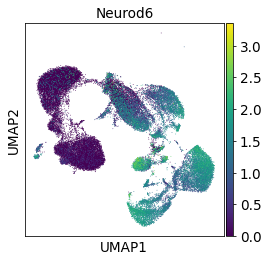

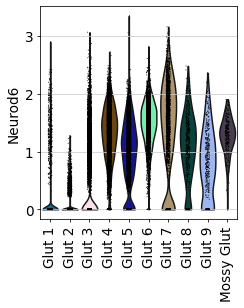

In [6]:
sc.pl.umap(adata[adata.obs.louvain_coarse.str.contains('Glut')], color='Neurod6')
sc.pl.violin(
    adata[adata.obs.louvain_coarse.str.contains('Glut')], 
    groupby='louvain_coarse',
    keys='Neurod6',
    rotation=90
)

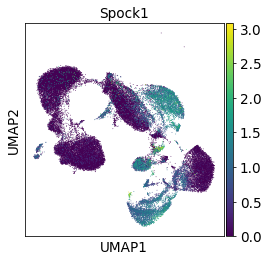

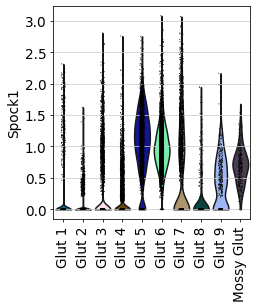

In [7]:
sc.pl.umap(adata[adata.obs.louvain_coarse.str.contains('Glut')], color='Spock1')
sc.pl.violin(
    adata[adata.obs.louvain_coarse.str.contains('Glut')], 
    groupby='louvain_coarse',
    keys='Spock1',
    rotation=90
)

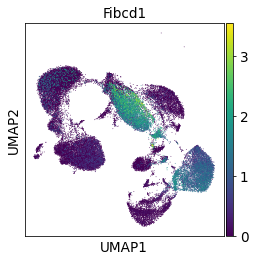

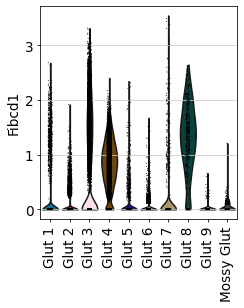

In [8]:
sc.pl.umap(adata[adata.obs.louvain_coarse.str.contains('Glut')], color='Fibcd1')
sc.pl.violin(
    adata[adata.obs.louvain_coarse.str.contains('Glut')], 
    groupby='louvain_coarse',
    keys='Fibcd1',
    rotation=90
)

Trying to set attribute `.uns` of view, copying.


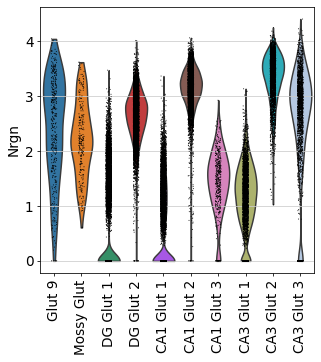

In [28]:
sc.pl.violin(
    adata[adata.obs.louvain_coarse.str.contains('Glut')], 
    groupby='louvain_coarse',
    keys='Nrgn',
    rotation=90
)

In [12]:
adata.obs.louvain_coarse = adata.obs.louvain_coarse.cat.add_categories(['CA1 Glut 1', 'CA1 Glut 2', 'CA1 Glut 3'])
adata.obs.louvain_coarse[adata.obs.louvain_coarse.isin(['Glut 3'])] = 'CA1 Glut 1'
adata.obs.louvain_coarse[adata.obs.louvain_coarse.isin(['Glut 4'])] = 'CA1 Glut 2'
adata.obs.louvain_coarse[adata.obs.louvain_coarse.isin(['Glut 8'])] = 'CA1 Glut 3'

In [13]:
adata.obs.louvain_coarse = adata.obs.louvain_coarse.cat.add_categories(['CA3 Glut 1', 'CA3 Glut 2', 'CA3 Glut 3'])
adata.obs.louvain_coarse[adata.obs.louvain_coarse.isin(['Glut 5'])] = 'CA3 Glut 1'
adata.obs.louvain_coarse[adata.obs.louvain_coarse.isin(['Glut 6'])] = 'CA3 Glut 2'
adata.obs.louvain_coarse[adata.obs.louvain_coarse.isin(['Glut 7'])] = 'CA3 Glut 3'

In [52]:
adata.obs.louvain_coarse = adata.obs.louvain_coarse.cat.add_categories(['CA2 Glut'])
adata.obs.louvain_coarse[adata.obs.louvain_coarse.isin(['Glut 9'])] = 'CA2 Glut'

In [53]:
adata.obs.louvain_coarse = adata.obs.louvain_coarse.cat.remove_unused_categories()
sc.tl.rank_genes_groups(adata, groupby='louvain_coarse', key_added='rank_genes_louvain_coarse')

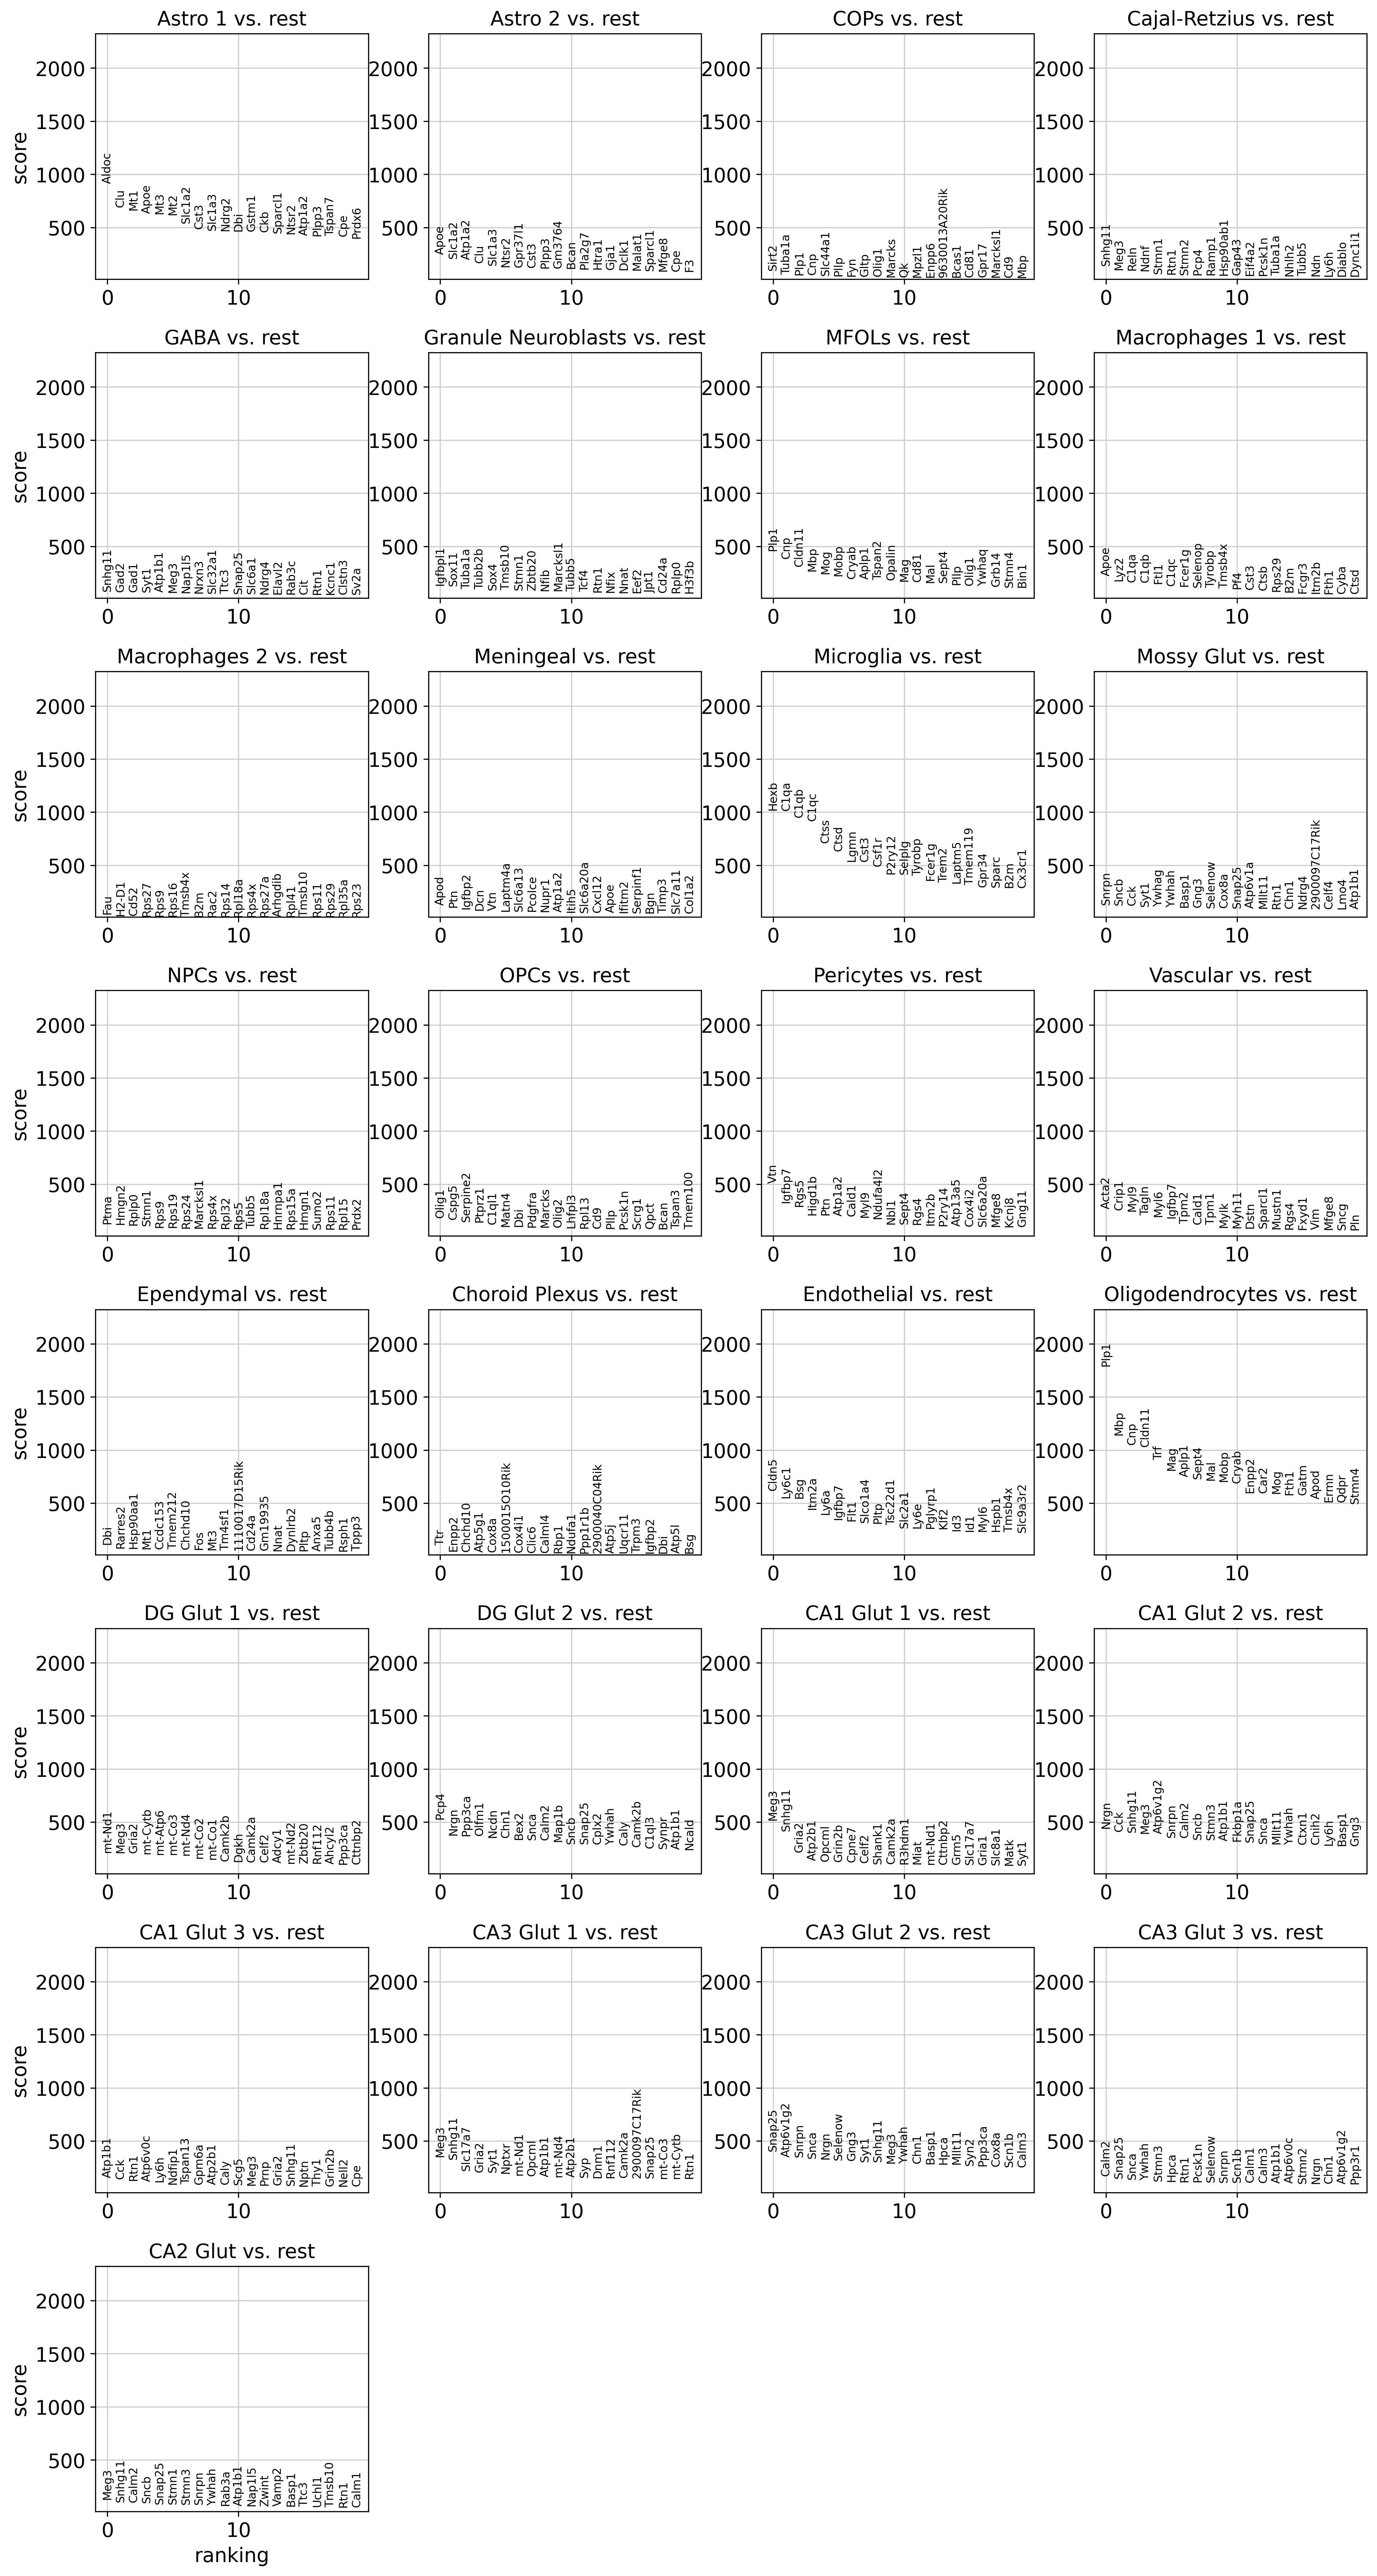

In [54]:
plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 300
sc.pl.rank_genes_groups(adata, key='rank_genes_louvain_coarse')

In [55]:
adata

AnnData object with n_obs × n_vars = 125896 × 17390
    obs: 'knockout', 'line', 'mouse', 'condition', 'sample', 'batch', 'comb', 'n_counts', 'log_counts', 'n_genes', 'hbb_frac', 'ribo_frac', 'mt_frac', 'doublet_score', 'size_factors', 'log_genes', 'louvain_ref', 'louvain_r1', 'louvain_r0.5', 'S_score', 'G2M_score', 'phase', 'louvain_coarse', 'louvain_tmp', 'louvain_Glut 9_sub'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'draw_graph', 'hvg', 'louvain', 'louvain_coarse_colors', 'louvain_r0.5_colors', 'louvain_r1_colors', 'louvain_subclustered_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_Astro 1_sub', 'rank_genes_Astro 2_sub', 'rank_genes_Cajal-Retzius_sub', 'rank_genes_Endothelial 2_sub', 'rank_genes_Endothelial_sub', 'rank_genes_Ependymal_sub', 'rank_genes_GABA_sub', 'rank_genes_Glut 1_sub', 'rank_genes_Glut 2_sub', 'rank_genes_Glut 3_sub', 'rank_genes_Glut 4_sub', 'rank_genes_Glut 5_sub', 'rank_genes_Glut 6_sub', 'ran

In [69]:
for colname in list(adata.uns.keys()):
    if 'sub' in colname:
        del adata.uns[colname]

In [71]:
for colname in adata.obs:
    if 'sub' in colname:
        del adata.obs[colname]

In [6]:
adata.obs.louvain_coarse = adata.obs.louvain_coarse.cat.reorder_categories(
    [
        'GABA',
        'Cajal-Retzius',
        'Granule Neuroblasts',
        'NPCs',
        'DG Glut 1',
        'DG Glut 2',
        'Mossy Glut',
        'CA1 Glut 1',
        'CA1 Glut 2',
        'CA1 Glut 3',
        'CA2 Glut',
        'CA3 Glut 1',
        'CA3 Glut 2',
        'CA3 Glut 3',
        'Astro 1',
        'Astro 2',
        'OPCs',
        'COPs',
        'MFOLs',
        'Oligodendrocytes',
        'Microglia',
        'Macrophages 1',
        'Macrophages 2',
        'Ependymal',
        'Pericytes',
        'Endothelial',
        'Meningeal',
        'Vascular',
        'Choroid Plexus'
    ]
)

In [3]:
adata = sc.read('./../../data/processed/adata_reannotated_final.h5ad')

In [6]:
adata.layers['counts'] = adata.layers['counts'].A

In [7]:
adata.write('./../../data/processed/adata_reannotated_final.h5ad')